Установка зависимостей

In [1]:
# # Устанавливаем необходимые библиотеки
!pip install torch torchaudio librosa tqdm streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [2]:
!pip install pydub
!apt-get install -y ffmpeg
import os
os.environ["PATH"] += os.pathsep + "/usr/bin"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [3]:
!pip install pyngrok


In [4]:
!pip install opencv-python-headless


In [5]:
!pip install streamlit-audiorec


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 9.6 MB/s eta 0:00:00


In [6]:
!pip install streamlit-webrtc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.3/217.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyopenssl
    Found existing installation: pyOpenSSL 24.2.1
    Uninstalling pyOpenSSL-24.2.1:
      Successfully uninstalled pyOpenSSL-24.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

Импорт библиотек

In [7]:
import os
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from tqdm import tqdm
import pickle

Загрузка датасета Google Speech Commands

In [9]:
# Выбираем только часть классов для ускорения работы
SAMPLE_CLASSES = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

class SubsetSC(torchaudio.datasets.SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__(".", download=True)
        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as f:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in f]
        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]

train_set = SubsetSC("training")
val_set = SubsetSC("validation")
test_set = SubsetSC("testing")

100%|██████████| 2.26G/2.26G [01:19<00:00, 30.6MB/s]


In [10]:
import os
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm
import random

# Выбранные команды и параметры для unknown классов
SAMPLE_CLASSES = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
INCLUDE_UNKNOWN_FRACTION = 0.04  # Доля unknown классов для включения

class SubsetSC(torchaudio.datasets.SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__(".", download=True)
        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]
        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]
# train_set = SubsetSC("training")
# val_set = SubsetSC("validation")
# test_set = SubsetSC("testing")
def filter_dataset(dataset, classes, include_unknown=False, unknown_fraction=0.2):
    filtered = []
    unknown_classes = set()
    all_items = []

    # Сначала собираем все элементы и определяем unknown классы
    for waveform, sample_rate, label, *_ in tqdm(dataset, desc="Scanning dataset"):
        all_items.append((waveform, sample_rate, label))
        if label not in classes:
            unknown_classes.add(label)

    # Преобразуем в список для детерминированного поведения
    unknown_classes = list(unknown_classes)

    # Выбираем, какие unknown классы включить
    if include_unknown:
        # Вычисляем сколько примеров каждого unknown класса включить
        n_total_unknown = int(unknown_fraction * len(all_items))
        n_per_unknown = max(1, n_total_unknown // len(unknown_classes))

        # Собираем примеры для каждого unknown класса
        unknown_examples = {}
        for label in unknown_classes:
            unknown_examples[label] = []

        for item in all_items:
            waveform, sample_rate, label = item
            if label in unknown_classes:
                unknown_examples[label].append(item)

        # Выбираем случайные примеры из каждого unknown класса
        selected_unknown = []
        for label in unknown_classes:
            examples = unknown_examples[label]
            if len(examples) > n_per_unknown:
                selected = random.sample(examples, n_per_unknown)
            else:
                selected = examples
            # Меняем метку на "unknown"
            for item in selected:
                waveform, sample_rate, _ = item
                selected_unknown.append((waveform, sample_rate, "unknown"))

    # Теперь фильтруем основные классы
    for item in all_items:
        waveform, sample_rate, label = item
        if label in classes:
            filtered.append((waveform, sample_rate, label))

    # Добавляем unknown классы, если требуется
    if include_unknown:
        filtered.extend(selected_unknown)

    return filtered

# Загружаем данные с unknown классами
train_data = filter_dataset(train_set, SAMPLE_CLASSES, include_unknown=True, unknown_fraction=INCLUDE_UNKNOWN_FRACTION)
val_data = filter_dataset(val_set, SAMPLE_CLASSES, include_unknown=True, unknown_fraction=INCLUDE_UNKNOWN_FRACTION)
test_data = filter_dataset(test_set, SAMPLE_CLASSES, include_unknown=True, unknown_fraction=INCLUDE_UNKNOWN_FRACTION)

# Проверяем распределение классов
def print_class_distribution(data, name):
    print(f"\nclass distribution for {name}:")
    counts = {}
    for _, _, label in data:
        counts[label] = counts.get(label, 0) + 1
    for label, count in counts.items():
        print(f"{label}: {count}")

print_class_distribution(train_data, "train")
print_class_distribution(val_data, "validation")
print_class_distribution(test_data, "test")

Scanning dataset: 100%|██████████| 11005/11005 [01:05<00:00, 166.80it/s]



class distribution for train:
down: 3134
go: 3106
left: 3037
no: 3130
off: 2970
on: 3086
right: 3019
stop: 3111
up: 2948
yes: 3228
unknown: 3375

class distribution for validation:
right: 363
go: 372
no: 406
left: 352
stop: 350
up: 350
down: 377
yes: 397
on: 363
off: 373
unknown: 375

class distribution for test:
right: 396
go: 402
no: 405
left: 412
stop: 411
up: 425
down: 406
yes: 419
on: 396
off: 402
unknown: 425


### Загрузка и отбор датасета Google Speech Commands

В этом блоке осуществляется загрузка официального датасета [Google Speech Commands](https://huggingface.co/datasets/google/speech_commands), содержащего короткие аудиозаписи голосовых команд. Для ускорения работы выбираются только 10 целевых классов: `yes`, `no`, `up`, `down`, `left`, `right`, `on`, `off`, `stop`, `go`.

Создаётся класс `SubsetSC`, который наследуется от `torchaudio.datasets.SPEECHCOMMANDS` и перегружает метод получения подмножества. В зависимости от значения `subset` загружается список путей к файлам:
- для `training` из него исключаются валидационные и тестовые примеры,
- для `validation` и `testing` загружаются соответствующие списки.

Результатом работы являются три поднабора — `train_set`, `val_set` и `test_set`, содержащие отфильтрованные записи только из нужных классов. Это позволяет работать с компактной и сфокусированной выборкой для обучения и тестирования модели.


Фильтрация данных (только нужные классы)

In [ ]:
# def filter_dataset(dataset, classes):
#     filtered = []
#     for waveform, sample_rate, label, *_ in tqdm(dataset):
#         if label in classes:
#             filtered.append((waveform, sample_rate, label))
#     return filtered

# train_data = filter_dataset(train_set, SAMPLE_CLASSES)
# val_data = filter_dataset(val_set, SAMPLE_CLASSES)
# test_data = filter_dataset(test_set, SAMPLE_CLASSES)

100%|██████████| 11005/11005 [00:24<00:00, 440.84it/s]


### Фильтрация датасета по нужным классам

Этот блок фильтрует записи из загруженного датасета, оставляя только те, что относятся к заранее определённым голосовым командам (`SAMPLE_CLASSES`). Функция `filter_dataset` перебирает каждый элемент (включая аудиосигнал `waveform`, частоту дискретизации `sample_rate` и метку `label`) и добавляет его в итоговый список, если метка входит в список целевых классов. Для визуализации прогресса используется `tqdm`.

Результатом являются три новых списка: `train_data`, `val_data`, `test_data` — очищенные от лишних классов и готовые для обучения, валидации и тестирования модели.


Кодировка меток и препроцессинг

In [ ]:
# label2idx = {label: idx for idx, label in enumerate(SAMPLE_CLASSES)}
# idx2label = {idx: label for label, idx in label2idx.items()}

# def preprocess(waveform, sample_rate, label):
#     # Перевод в моно (если вдруг стерео)
#     waveform = waveform.mean(dim=0)
#     # Получение мел-спектрограммы
#     mel = torchaudio.transforms.MelSpectrogram(
#         sample_rate=sample_rate, n_mels=64)(waveform)
#     mel = torchaudio.transforms.AmplitudeToDB()(mel)
#     return mel, label2idx[label]


In [11]:
# Обновляем список классов, добавляя 'unknown'
SAMPLE_CLASSES_WITH_UNKNOWN = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'unknown']

# Создаем словари для преобразования меток
label2idx = {label: idx for idx, label in enumerate(SAMPLE_CLASSES_WITH_UNKNOWN)}
idx2label = {idx: label for label, idx in label2idx.items()}

def preprocess(waveform, sample_rate, label):
    # 1. Конвертируем в моно (если стерео)
    if waveform.dim() > 1:
        waveform = waveform.mean(dim=0)

    # 2. Ресемплирование до 16kHz при необходимости
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)
        sample_rate = 16000

    # 3. Обрезка/дополнение до фиксированной длины (1 секунда)
    target_length = sample_rate  # 1 секунда аудио
    if waveform.size(0) < target_length:
        # Дополняем нулями
        padding = target_length - waveform.size(0)
        waveform = torch.nn.functional.pad(waveform, (0, padding))
    elif waveform.size(0) > target_length:
        # Случайная обрезка
        start = torch.randint(0, waveform.size(0) - target_length, (1,)).item()
        waveform = waveform[start:start+target_length]

    # 4. Получение мел-спектрограммы
    mel_transform = torchaudio.transforms.MelSpectrogram(
        sample_rate=sample_rate,
        n_mels=64,
        n_fft=1024,
        hop_length=256
    )
    mel = mel_transform(waveform)

    # 5. Конвертация в dB
    db_transform = torchaudio.transforms.AmplitudeToDB()
    mel_db = db_transform(mel)

    # 6. Нормализация
    mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-8)

    # Преобразуем метку в индекс
    # Если метка не в SAMPLE_CLASSES, считаем её 'unknown'
    processed_label = label if label in SAMPLE_CLASSES else 'unknown'

    return mel_db, label2idx[processed_label]

### Кодировка меток и препроцессинг аудио

В этом блоке создаются два словаря: `label2idx` для преобразования текстовых меток в числовые индексы и `idx2label` — для обратного отображения.

Функция `preprocess()` выполняет предварительную обработку аудио:
- преобразует сигнал в моно (на случай, если он стерео),
- извлекает мел-спектрограмму с помощью `torchaudio.transforms.MelSpectrogram`,
- переводит её в шкалу децибел через `AmplitudeToDB`.

Возвращаются: готовая к модели спектрограмма и числовая метка соответствующего класса.


Кастомный Dataset и DataLoader

In [ ]:
# import torch.nn.functional as F

# def pad_collate_fn(batch):
#     # batch = list of (mel, label_idx)
#     mels = [item[0] for item in batch]
#     labels = torch.tensor([item[1] for item in batch])
#     # Определяем максимальную длину (ширину)
#     max_len = max(mel.shape[-1] for mel in mels)
#     # Паддим каждый mel до max_len справа нулями
#     mels_padded = [F.pad(mel, (0, max_len - mel.shape[-1])) for mel in mels]
#     mels_tensor = torch.stack(mels_padded)
#     return mels_tensor, labels


In [ ]:
# class SpeechCommandsDataset(Dataset):
#     def __init__(self, data):
#         self.data = data
#     def __len__(self):
#         return len(self.data)
#     def __getitem__(self, idx):
#         waveform, sample_rate, label = self.data[idx]
#         mel, label_idx = preprocess(waveform, sample_rate, label)
#         return mel, label_idx

# batch_size = 64
# train_dataset = SpeechCommandsDataset(train_data)
# val_dataset = SpeechCommandsDataset(val_data)
# test_dataset = SpeechCommandsDataset(test_data)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, collate_fn=pad_collate_fn)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, collate_fn=pad_collate_fn)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, collate_fn=pad_collate_fn)



In [15]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

def add_noise(waveform, noise_level=0.003):
    """Добавляет случайный шум к аудио"""
    noise = torch.randn_like(waveform) * noise_level
    return waveform + noise

def time_shift(waveform, max_shift_ms=150, sample_rate=16000):
    """Сдвигает аудио во времени на случайное количество миллисекунд.

    Args:
        waveform (torch.Tensor): Аудио сигнал, форма [samples] или [channels, samples]
        max_shift_ms (int): Максимальный сдвиг в миллисекундах
        sample_rate (int): Частота дискретизации (по умолчанию 16kHz)

    Returns:
        torch.Tensor: Сдвинутый сигнал той же формы, что и входной
    """
    # Конвертируем в двумерный тензор, если нужно
    if waveform.dim() == 1:
        waveform = waveform.unsqueeze(0)  # [1, samples]

    max_shift_samples = int((max_shift_ms * sample_rate) / 1000)
    shift_samples = random.randint(-max_shift_samples, max_shift_samples)

    if shift_samples > 0:
        # Сдвиг вперед: обрезаем начало, добавляем нули в конец
        waveform = torch.cat([
            waveform[:, shift_samples:],
            torch.zeros_like(waveform[:, :shift_samples])
        ], dim=1)
    elif shift_samples < 0:
        # Сдвиг назад: добавляем нули в начало, обрезаем конец
        waveform = torch.cat([
            torch.zeros_like(waveform[:, :-shift_samples]),
            waveform[:, :shift_samples]
        ], dim=1)

    # Возвращаем исходную размерность
    if waveform.size(0) == 1:
        waveform = waveform.squeeze(0)

    return waveform

def change_volume(waveform, gain_range=(0.7, 1.3)):
    """Изменяет громкость аудио на случайный коэффициент"""
    gain = random.uniform(gain_range[0], gain_range[1])
    return waveform * gain
class SpeechCommandsDataset(Dataset):
    def __init__(self, data, sample_classes, augment=False):
        self.data = data
        self.sample_classes = sample_classes
        self.augment = augment  # Флаг для аугментации
        # Создаем словари для преобразования меток
        self.label2idx = {label: idx for idx, label in enumerate(sample_classes)}
        self.idx2label = {idx: label for idx, label in enumerate(sample_classes)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        waveform, sample_rate, label = self.data[idx]

        if self.augment:
            # Применяем аугментации с вероятностью 50%
            if random.random() > 0.5:
                waveform = add_noise(waveform, noise_level=0.003)
            if random.random() > 0.5:
                waveform = time_shift(waveform, max_shift_ms=150)
            if random.random() > 0.5:
                waveform = change_volume(waveform, gain_range=(0.7, 1.3))

        mel = self.preprocess_audio(waveform, sample_rate)

        # Преобразуем метку в индекс (неизвестные -> 'unknown')
        processed_label = label if label in self.sample_classes else 'unknown'
        label_idx = self.label2idx[processed_label]

        return mel, label_idx

    def preprocess_audio(self, waveform, sample_rate):
        # 1. Конвертируем в моно
        if waveform.dim() > 1:
            waveform = waveform.mean(dim=0)

        # 2. Ресемплирование до 16kHz
        if sample_rate != 16000:
            resampler = torchaudio.transforms.Resample(
                orig_freq=sample_rate,
                new_freq=16000
            )
            waveform = resampler(waveform)

        # 3. Обрезка/дополнение до 1 секунды (16000 samples)
        target_length = 16000
        if waveform.size(0) < target_length:
            # Дополняем нулями
            waveform = F.pad(waveform, (0, target_length - waveform.size(0)))
        elif waveform.size(0) > target_length:
            # Случайная обрезка
            start = torch.randint(0, waveform.size(0) - target_length, (1,)).item()
            waveform = waveform[start:start+target_length]

        # 4. Получение мел-спектрограммы
        mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=16000,
            n_mels=64,
            n_fft=1024,
            hop_length=256
        )
        mel = mel_transform(waveform)

        # 5. Конвертация в dB и нормализация
        mel_db = torchaudio.transforms.AmplitudeToDB()(mel)
        mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-8)

        return mel_db

def pad_collate_fn(batch):
    """Collate function для выравнивания спектрограмм по времени"""
    mels = [item[0] for item in batch]
    labels = torch.tensor([item[1] for item in batch])

    # Находим максимальную длину временной оси
    max_len = max(mel.shape[-1] for mel in mels)

    # Паддим каждый mel до max_len
    mels_padded = torch.stack([
        F.pad(mel, (0, max_len - mel.shape[-1]))
        for mel in mels
    ])

    # Добавляем размер канала (1 для mono)
    mels_padded = mels_padded.unsqueeze(1)

    return mels_padded, labels

# Параметры датасета
SAMPLE_CLASSES_WITH_UNKNOWN = ['yes', 'no', 'up', 'down', 'left', 'right',
                             'on', 'off', 'stop', 'go', 'unknown']
batch_size = 64

# Создаем датасеты
train_dataset = SpeechCommandsDataset(train_data, SAMPLE_CLASSES_WITH_UNKNOWN, augment=True)  # Только для тренировочных данных
val_dataset = SpeechCommandsDataset(val_data, SAMPLE_CLASSES_WITH_UNKNOWN)
test_dataset = SpeechCommandsDataset(test_data, SAMPLE_CLASSES_WITH_UNKNOWN)

# Создаем DataLoader'ы
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
    collate_fn=pad_collate_fn,
    pin_memory=True,
    num_workers=4
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    drop_last=True,
    collate_fn=pad_collate_fn,
    pin_memory=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    drop_last=True,
    collate_fn=pad_collate_fn,
    pin_memory=True,
    num_workers=2
)

### Кастомный Dataset и DataLoader

В этом блоке создаются:

- **Функция `pad_collate_fn(batch)`** — применяется при формировании батчей:
  - собирает мел-спектрограммы и метки из переданных элементов;
  - дополняет все спектрограммы нулями до одинаковой ширины;
  - объединяет их в батч.

- **Класс `SpeechCommandsDataset`** — наследуется от `torch.utils.data.Dataset`:
  - хранит данные (waveform, sample_rate, label);
  - в методе `__getitem__` преобразует сигнал в мел-спектрограмму и возвращает её с индексом класса.

- **DataLoader’ы** `train_loader`, `val_loader`, `test_loader` — обеспечивают итеративную подачу батчей в модель с кастомной функцией `collate_fn` и перемешиванием (shuffle) обучающих данных.


Модель

In [16]:
import torch.nn as nn
import torch

class SpeechCommandModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # CNN блок для извлечения признаков
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # [B, 16, 64, T]
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),  # [B, 16, 32, T//2]

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # [B, 32, 32, T//2]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # [B, 32, 16, T//4]

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # [B, 64, 16, T//4]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # [B, 64, 8, T//8]
        )

        # Глобальный средний пулинг
        self.gap = nn.AdaptiveAvgPool2d((1, 1))  # [B, 64, 1, 1]

        # Полносвязный классификатор
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # Входной тензор уже должен быть формы [B, 1, 64, T]
        x = self.cnn(x)
        x = self.gap(x)
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Создаем модель с учетом класса 'unknown'
model = SpeechCommandModel(num_classes=len(SAMPLE_CLASSES_WITH_UNKNOWN)).to(device)

# Выводим архитектуру модели
print(model)

# # Проверка работы модели на тестовом батче
# test_batch, test_labels = next(iter(train_loader))
# test_batch = test_batch.to(device)
# output = model(test_batch)
# print(f"\nTest batch output shape: {output.shape}")  # Должно быть [batch_size, num_classes]

Using device: cpu
SpeechCommandModel(
  (cnn): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=64, out

### Архитектура нейросети `SpeechCommandModel`

Модель построена на основе сверточной нейросети (CNN) и используется для классификации коротких аудиофрагментов:

- **CNN-блок (`self.cnn`)**:
  - 2 сверточных слоя с ядром 3×3 и ReLU-активацией;
  - 2 слоя субдискретизации (MaxPooling);
  - работает с входами формата `[batch, 1, mel, time]`.

- **GAP (Global Average Pooling)** — `nn.AdaptiveAvgPool2d((1, 1))` — приводит карту признаков к фиксированному размеру независимо от входа.

- **Полносвязный блок (`self.fc`)**:
  - слой `Flatten`;
  - линейный слой 16→64;
  - ReLU;
  - линейный слой 64→количество классов.

- **Метод `forward(x)`**:
  - добавляет канал (`unsqueeze`);
  - последовательно применяет все блоки.

Модель инициализируется через:
```python
model = SpeechCommandModel(num_classes=len(SAMPLE_CLASSES)).to(device)


Тренировка модели

In [17]:
# Гиперпараметры
learning_rate = 0.001
epochs = 15

# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Функция для вычисления точности
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Цикл обучения
for epoch in range(epochs):
    # Обучение
    model.train()
    train_loss = 0
    train_acc = 0

    for batch, labels in train_loader:
        batch, labels = batch.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(outputs, labels)

    # Валидация
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for batch, labels in val_loader:
            batch, labels = batch.to(device), labels.to(device)
            outputs = model(batch)
            val_loss += criterion(outputs, labels).item()
            val_acc += accuracy(outputs, labels)

    # Вывод статистики
    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc/len(train_loader):.4f}")
    print(f"Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc/len(val_loader):.4f}")
    print("-" * 50)

Epoch 1/15:
Train Loss: 1.9569 | Train Acc: 0.2767
Val Loss: 3.1291 | Val Acc: 0.1758
--------------------------------------------------


KeyboardInterrupt: 

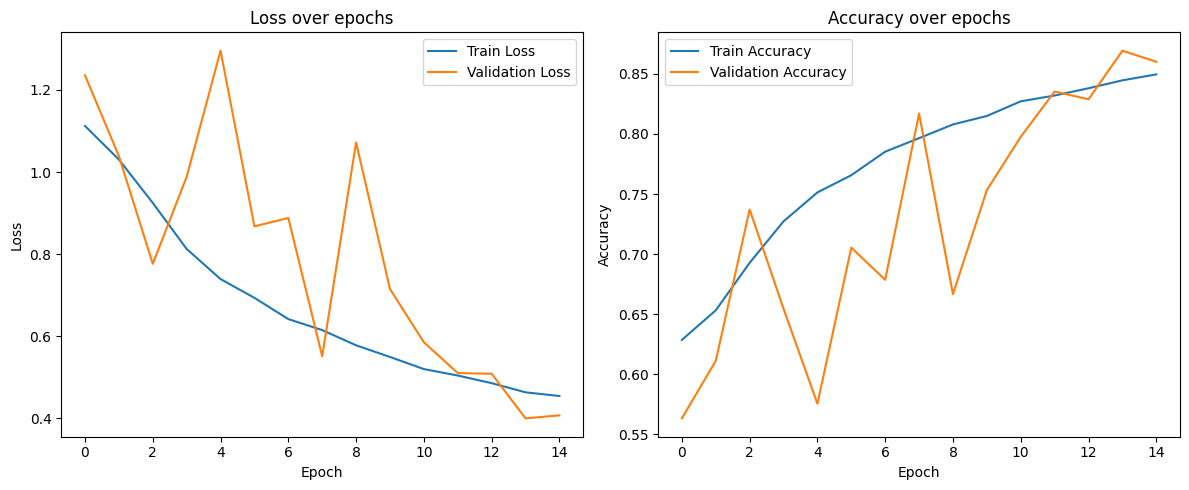


Final Test Results:
Test Loss: 0.4453
Test Accuracy: 0.8529


In [20]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

# Гиперпараметры
learning_rate = 0.001
epochs = 15
warmup_epochs = 3  # Количество эпох для warmup
patience = 5       # Количество эпох для ранней остановки

# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Списки для хранения истории метрик
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

# Переменные для ранней остановки
best_val_loss = np.inf
epochs_no_improve = 0
early_stop = False

# Функция для отрисовки графиков
def plot_metrics():
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))

    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Цикл обучения
for epoch in range(epochs):
    # Реализация warmup
    if epoch < warmup_epochs:
        lr = learning_rate * (epoch + 1) / warmup_epochs
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr

    # Обучение
    model.train()
    train_loss = 0
    train_acc = 0

    for batch, labels in train_loader:
        batch, labels = batch.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(outputs, labels)

    # Валидация
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for batch, labels in val_loader:
            batch, labels = batch.to(device), labels.to(device)
            outputs = model(batch)
            val_loss += criterion(outputs, labels).item()
            val_acc += accuracy(outputs, labels)

    # Сохраняем метрики
    train_loss_history.append(train_loss/len(train_loader))
    train_acc_history.append((train_acc/len(train_loader)).cpu().numpy())
    val_loss_history.append(val_loss/len(val_loader))
    val_acc_history.append((val_acc/len(val_loader)).cpu().numpy())

    # Проверка на улучшение val_loss для ранней остановки
    if val_loss_history[-1] < best_val_loss:
        best_val_loss = val_loss_history[-1]
        epochs_no_improve = 0
        # Сохраняем лучшие веса модели
        torch.save(model.state_dict(), 'best_model_aug.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            early_stop = True

    # Вывод статистики
    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")
    print(f"Train Loss: {train_loss_history[-1]:.4f} | Train Acc: {train_acc_history[-1]:.4f}")
    print(f"Val Loss: {val_loss_history[-1]:.4f} | Val Acc: {val_acc_history[-1]:.4f}")
    if epochs_no_improve > 0:
        print(f"No improvement for {epochs_no_improve} epochs")
    print("-" * 50)

    # Отрисовка графиков
    plot_metrics()

    # Ранняя остановка
    if early_stop:
        print(f"Early stopping triggered after {epoch+1} epochs!")
        # Загружаем лучшие веса модели
        model.load_state_dict(torch.load('best_model.pth'))
        break

# Финальная оценка на тестовом наборе
model.eval()
test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, labels in test_loader:
        batch, labels = batch.to(device), labels.to(device)
        outputs = model(batch)
        test_loss += criterion(outputs, labels).item()
        test_acc += accuracy(outputs, labels)

print("\nFinal Test Results:")
print(f"Test Loss: {test_loss/len(test_loader):.4f}")
print(f"Test Accuracy: {test_acc/len(test_loader):.4f}")

In [ ]:
def train_model(model, train_loader, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for X, y in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            out = model(X)
            loss = loss_fn(out, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()

        # Выводим loss и accuracy
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")

# Использование
train_model(model, train_loader, epochs=10)

### Обучение модели `SpeechCommandModel`

Для обучения модели используется функция `train_model(model, loader, epochs)`:

- **Оптимизатор**: `Adam` с learning rate `0.001`.
- **Функция потерь**: `CrossEntropyLoss`, так как задача — многоклассовая классификация.
- **Цикл по эпохам**:
  - перевод модели в режим обучения (`model.train()`);
  - перебор батчей из `DataLoader`;
  - перемещение данных и меток на устройство (`device`);
  - обнуление градиентов;
  - прямой проход (forward pass);
  - вычисление ошибки и обратное распространение (backpropagation);
  - шаг оптимизации (`optimizer.step()`).

Каждая эпоха выводит среднее значение ошибки (`loss`) по всем батчам, что помогает следить за динамикой обучения.

В выводе видно, что loss уменьшается от `2.32` до `1.30`, что говорит о процессе обучения модели.


In [ ]:
import pickle

# # Сохраняем модель
# torch.save(model.state_dict(), "best_model.pth")
# Сохраняем label2idx для декодирования классов
with open("label2idx.pkl", "wb") as f:
    pickle.dump(label2idx, f)

print("Модель и словарь меток сохранены!")


### Сохранение обученной модели и словаря меток

В этом блоке сохраняются:

- **Модель** `SpeechCommandModel` в виде весов (`state_dict`) в файл `speech_command_cnn.pth`.
- **Словарь меток** `label2idx` с помощью библиотеки `pickle` в файл `label2idx.pkl`.

Это необходимо для последующего использования модели без повторного обучения: веса можно загрузить, а словарь — использовать для преобразования предсказаний обратно в метки (`yes`, `no`, `stop` и т.д.).


In [ ]:
NGROK_AUTH_TOKEN = "2uRWQsVBhRrursScvzOfGGB5gYq_4pAq9D9vD8RKjvPfmvriY"

##### Настройка авторизации для ngrok
Для туннелирования локального Streamlit-приложения в Colab используется сервис ngrok. В этом блоке задаётся персональный токен авторизации `NGROK_AUTH_TOKEN`, который можно получить на сайте [https://dashboard.ngrok.com/get-started/setup](https://dashboard.ngrok.com/get-started/setup).



In [ ]:
%%writefile app.py
import streamlit as st
import torch
import torchaudio
import torchaudio.transforms as T
import torch.nn as nn
import pickle
import io
import numpy as np
import tempfile
from pydub import AudioSegment

st.set_page_config(page_title="Голосовые команды", layout="centered")
st.title("🎤 Распознавание голосовых команд из файла")

SAMPLE_CLASSES = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

class SpeechCommandModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.gap(x)
        x = self.fc(x)
        return x

# Загрузка модели
device = torch.device('cpu')
model = SpeechCommandModel(num_classes=len(SAMPLE_CLASSES))
model.load_state_dict(torch.load("speech_command_cnn.pth", map_location=device))
model.eval()

# Загрузка словаря меток
with open("label2idx.pkl", "rb") as f:
    label2idx = pickle.load(f)
idx2label = {v: k for k, v in label2idx.items()}

st.markdown("""
#### Инструкция:
1. Запишите команду через [online-voice-recorder.com/ru](https://online-voice-recorder.com/ru) или любое другое средство
2. Сохраните как `.wav` или `.mp3` файл
3. Загрузите его ниже — система сама приведёт формат к нужному
""")

uploaded_file = st.file_uploader("Загрузите аудиофайл (wav/mp3)", type=["wav", "mp3"])
if uploaded_file is not None:
    st.audio(uploaded_file)

    try:
        # Сохраняем во временный файл
        with tempfile.NamedTemporaryFile(delete=False, suffix=".wav") as tmp_wav:
            if uploaded_file.name.endswith(".mp3"):
                sound = AudioSegment.from_file(uploaded_file, format="mp3")
                sound = sound.set_frame_rate(16000).set_channels(1)
                sound.export(tmp_wav.name, format="wav")
            else:
                tmp_wav.write(uploaded_file.read())

            waveform, sr = torchaudio.load(tmp_wav.name)

        # Моно
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Приведение к 16 кГц
        if sr != 16000:
            resampler = T.Resample(sr, 16000)
            waveform = resampler(waveform)
            sr = 16000

        # Приведение к 1 секунде
        if waveform.shape[1] < 16000:
            pad_len = 16000 - waveform.shape[1]
            waveform = torch.nn.functional.pad(waveform, (0, pad_len))
        else:
            waveform = waveform[:, :16000]

        # Спектрограмма
        mel = T.MelSpectrogram(sr, n_mels=64)(waveform)
        mel = T.AmplitudeToDB()(mel)
        mel = mel.unsqueeze(0)
        mel = torch.nn.functional.pad(mel, (0, max(0, 128 - mel.shape[-1])))
        mel = mel[:, :, :, :128]

        # Предсказание
        out = model(mel)
        pred = out.argmax(dim=1).item()
        command = idx2label.get(pred, "Неизвестно")

        st.success(f"✅ Распознанная команда: **{command}**")

    except Exception as e:
        st.error(f"❌ Ошибка при обработке: {e}")


Overwriting app.py


### Streamlit-приложение для распознавания голосовых команд

Этот блок реализует полноценное интерактивное веб-приложение с помощью библиотеки `Streamlit`, которое позволяет пользователю загружать аудиофайлы в формате `.wav` и распознавать голосовые команды на основе предварительно обученной модели.  

#### Ключевые компоненты:
- **Инициализация интерфейса:** через `st.set_page_config` и `st.title` задаются параметры страницы и заголовок.
- **Модель `SpeechCommandModel`:** сверточная нейросеть (CNN), обученная распознавать команды из ограниченного списка (`yes`, `no`, `left`, `right` и т.д.).
- **Загрузка весов модели:** используется сохранённый файл `speech_command_cnn.pth` и словарь меток `label2idx.pkl`.
- **Инструкция пользователю:** поясняет, как записать и загрузить аудио.
- **Обработка аудиофайла:**
  - преобразование в моно,
  - ресемплирование до 16 кГц,
  - обрезка или дополнение до 1 секунды (16000 сэмплов),
  - построение мел-спектрограммы и её нормализация.
- **Предсказание:** вход подается в модель, и отображается наиболее вероятная команда.
- **Обработка ошибок:** реализован `try-except`, чтобы приложение не падало при загрузке некорректных файлов.

> ⚠️ Важно: для корректной работы модель должна быть обучена на аудио с частотой 16 кГц и продолжительностью 1 секунда.


In [ ]:
from pyngrok import ngrok

# Авторизация ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Проброс порта 8501 для Streamlit
public_url = ngrok.connect(8501)
print('Streamlit URL:', public_url)

# Запуск Streamlit (это важно делать с !)
!streamlit run app.py & sleep 5


Streamlit URL: NgrokTunnel: "https://296e-34-125-33-130.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.33.130:8501

2025-05-25 15:33:46.777 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 347, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 217, in get_module_paths
    potential_paths = extract_paths(module)
                      ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", l

### Запуск Streamlit-приложения в Google Colab через Ngrok

Данный блок обеспечивает запуск и публичный доступ к веб-приложению `Streamlit`, развёрнутому в среде Google Colab, с помощью библиотеки `pyngrok`.

#### Этапы работы:
1. **Импорт модуля `ngrok`** — используется для проброса порта и создания публичного URL.
2. **Авторизация:** с помощью `ngrok.set_auth_token()` осуществляется подключение к аккаунту Ngrok, что необходимо для стабильной работы.
3. **Проброс порта 8501:** запускается туннель к стандартному порту Streamlit (8501), и в переменную `public_url` сохраняется внешняя ссылка для доступа.
4. **Запуск Streamlit:** команда `!streamlit run app.py & sleep 5` запускает приложение и даёт системе время инициализироваться.

> ✅ После выполнения блока в консоли появится активная ссылка, по которой можно открыть Streamlit-интерфейс прямо из браузера.
